In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import where as IF

In [2]:
customer_demog=pd.read_csv(r"C:\Users\DELL\Downloads\cust_demographics.csv")
customer_demog.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [3]:
Claims=pd.read_csv(r"C:\Users\DELL\Downloads\claims.csv")
Claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [4]:
# in customer_demog CUST_ID name is different to claims customer_id so we to rename it

In [5]:
customer_demog.rename(columns={'CUST_ID':'customer_id'},inplace=True)

In [6]:
customer_demog.head()

,customer_id,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [7]:
customer_demog.shape

(1085, 6)

In [8]:
Claims.shape

(1100, 10)

In [9]:
customer_demog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  1085 non-null   int64 
 1   gender       1085 non-null   object
 2   DateOfBirth  1085 non-null   object
 3   State        1085 non-null   object
 4   Contact      1085 non-null   object
 5   Segment      1085 non-null   object
dtypes: int64(1), object(5)
memory usage: 51.0+ KB


In [10]:
Claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 86.1+ KB


In [11]:
Claims.isnull().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
dtype: int64

In [12]:
Claims.duplicated().sum()

0

In [13]:
combine_data=pd.merge(customer_demog,Claims,on='customer_id',how='inner')
combine_data.head()

,customer_id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No


In [14]:
combine_data.head()

,customer_id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No


In [15]:
combine_data['DateOfBirth']=pd.to_datetime(combine_data.DateOfBirth,format='%d-%b-%y')
combine_data.loc[(combine_data.DateOfBirth.dt.year>2020),'DateOfBirth']=combine_data[combine_data.DateOfBirth.dt.year>2020]['DateOfBirth'].apply(lambda x: x-pd.DateOffset(years=100))


In [16]:
combine_data['claim_date']=pd.to_datetime(combine_data.claim_date)
combine_data['Contact']=pd.to_numeric(combine_data.Contact.str.replace('-',''),downcast='float')
combine_data.head()

,customer_id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,1970-01-13,ME,2.655431e+09,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,53522022,Other driver error,2018-02-02,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,63017412,Driver error,2018-04-04,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,1986-05-01,MA,4.131878e+09,Silver,13015401,Natural causes,2018-06-17,Auto,No,Material only,$1680,1.0,No


In [17]:
combine_data['claim_amount']=pd.to_numeric(combine_data.claim_amount.str.replace('$',''),downcast='float')
combine_data.head()

C:\Users\DELL\AppData\Local\Temp/ipykernel_9304/282872041.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  combine_data['claim_amount']=pd.to_numeric(combine_data.claim_amount.str.replace('$',''),downcast='float')


,customer_id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No
1,75740424,Female,1970-01-13,ME,2.655431e+09,Silver,33985796,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No
2,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,53522022,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes
3,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,63017412,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No
4,47830476,Female,1986-05-01,MA,4.131878e+09,Silver,13015401,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No


In [18]:
combine_data['flag']=IF(combine_data.police_report=='No',0, 
                        IF(combine_data.police_report=='Yes',1,np.nan))
combine_data.drop(columns=['police_report'],inplace=True)

In [19]:
combine_data

,customer_id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,21868593,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764,Driver error,2017-11-27,Auto,Material only,2980.0,1.0,No,0.0
1,75740424,Female,1970-01-13,ME,2.655431e+09,Silver,33985796,Crime,2018-10-03,Home,Material only,2980.0,3.0,No,NaN
2,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,53522022,Other driver error,2018-02-02,Auto,Material only,3369.5,1.0,Yes,0.0
3,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,63017412,Driver error,2018-04-04,Auto,Material only,1950.0,6.0,No,0.0
4,47830476,Female,1986-05-01,MA,4.131878e+09,Silver,13015401,Natural causes,2018-06-17,Auto,Material only,1680.0,1.0,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,1981-03-15,ND,4.594254e+09,Platinum,62020796,Other driver error,2018-09-06,Auto,Material only,1770.0,1.0,No,1.0
1081,42364152,Female,1996-07-07,ID,5.294622e+09,Silver,63269067,Other causes,2017-05-09,Home,Material only,2800.0,1.0,No,0.0
1082,19888166,Male,1990-04-11,WI,7.126520e+09,Gold,22690595,Other driver error,2017-05-15,Auto,Injury only,33080.0,2.0,No,1.0
1083,11256802,Female,1964-10-22,LA,4.693456e+09,Silver,12376894,Other driver error,2017-04-18,Auto,Material only,2840.0,4.0,No,0.0


In [20]:
combine_data.groupby('customer_id').first().reset_index(drop=True)

,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,Female,1978-05-23,DE,9.628791e+09,Platinum,69348631,Driver error,2018-04-10,Auto,Injury only,NaN,1.0,Yes,0.0
1,Male,1972-12-20,TX,1.738926e+09,Silver,40953049,Other causes,2018-04-04,Auto,Material and injury,39192.0,1.0,Yes,0.0
2,Male,1988-07-28,FL,3.645981e+09,Silver,45780237,Natural causes,2017-10-17,Auto,Material only,1621.5,2.0,Yes,NaN
3,Male,1971-08-19,CA,1.873488e+09,Gold,89833962,Other causes,2018-03-21,Auto,Material and injury,37040.0,1.0,No,1.0
4,Female,1980-08-10,NC,7.988625e+09,Gold,35782742,Other driver error,2018-07-27,Auto,Injury only,35250.0,3.0,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,Male,1965-01-28,UT,5.175625e+09,Silver,4549014,Other causes,2018-07-07,Auto,Injury only,21480.0,1.0,No,0.0
1074,Female,1966-06-19,HI,4.577521e+09,Gold,35453672,Natural causes,2018-01-06,Auto,Material and injury,14360.0,1.0,No,1.0
1075,Female,1963-11-18,NC,6.432465e+09,Silver,37305754,Natural causes,2018-04-04,Auto,Material only,1242.0,1.0,Yes,0.0
1076,Male,1995-06-08,OR,3.952466e+09,Gold,22960702,Driver error,2017-11-13,Auto,Material only,2415.0,2.0,Yes,0.0


In [21]:
combine_data.isnull().sum()

customer_id              0
gender                   0
DateOfBirth              0
State                    0
Contact                  0
Segment                  0
claim_id                 0
incident_cause           0
claim_date               0
claim_area               0
claim_type               0
claim_amount            65
total_policy_claims     10
fraudulent               0
flag                   296
dtype: int64

In [22]:
cat_col=['gender','State','Segment','incident_cause','claim_area','claim_type','fraudulent','flag']
cont_col=['total_policy_claims','claim_amount']

In [23]:
for col in cat_col:
    combine_data[col]=combine_data[col].fillna(combine_data[col].mode()[0])
combine_data
for i in cont_col:
    combine_data[i]=combine_data[i].fillna(combine_data[i].mean())
combine_data

,customer_id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,21868593,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764,Driver error,2017-11-27,Auto,Material only,2980.0,1.0,No,0.0
1,75740424,Female,1970-01-13,ME,2.655431e+09,Silver,33985796,Crime,2018-10-03,Home,Material only,2980.0,3.0,No,0.0
2,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,53522022,Other driver error,2018-02-02,Auto,Material only,3369.5,1.0,Yes,0.0
3,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,63017412,Driver error,2018-04-04,Auto,Material only,1950.0,6.0,No,0.0
4,47830476,Female,1986-05-01,MA,4.131878e+09,Silver,13015401,Natural causes,2018-06-17,Auto,Material only,1680.0,1.0,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,1981-03-15,ND,4.594254e+09,Platinum,62020796,Other driver error,2018-09-06,Auto,Material only,1770.0,1.0,No,1.0
1081,42364152,Female,1996-07-07,ID,5.294622e+09,Silver,63269067,Other causes,2017-05-09,Home,Material only,2800.0,1.0,No,0.0
1082,19888166,Male,1990-04-11,WI,7.126520e+09,Gold,22690595,Other driver error,2017-05-15,Auto,Injury only,33080.0,2.0,No,1.0
1083,11256802,Female,1964-10-22,LA,4.693456e+09,Silver,12376894,Other driver error,2017-04-18,Auto,Material only,2840.0,4.0,No,0.0


In [24]:
combine_data.isnull().sum()

customer_id            0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
claim_id               0
incident_cause         0
claim_date             0
claim_area             0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
flag                   0
dtype: int64

In [25]:
combine_data['Age']=round((combine_data.claim_date-combine_data.DateOfBirth).apply(lambda x : x.days)/365.25,2)      
combine_data

,customer_id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age
0,21868593,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764,Driver error,2017-11-27,Auto,Material only,2980.0,1.0,No,0.0,38.87
1,75740424,Female,1970-01-13,ME,2.655431e+09,Silver,33985796,Crime,2018-10-03,Home,Material only,2980.0,3.0,No,0.0,48.72
2,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,53522022,Other driver error,2018-02-02,Auto,Material only,3369.5,1.0,Yes,0.0,33.90
3,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,63017412,Driver error,2018-04-04,Auto,Material only,1950.0,6.0,No,0.0,34.06
4,47830476,Female,1986-05-01,MA,4.131878e+09,Silver,13015401,Natural causes,2018-06-17,Auto,Material only,1680.0,1.0,No,0.0,32.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,1981-03-15,ND,4.594254e+09,Platinum,62020796,Other driver error,2018-09-06,Auto,Material only,1770.0,1.0,No,1.0,37.48
1081,42364152,Female,1996-07-07,ID,5.294622e+09,Silver,63269067,Other causes,2017-05-09,Home,Material only,2800.0,1.0,No,0.0,20.84
1082,19888166,Male,1990-04-11,WI,7.126520e+09,Gold,22690595,Other driver error,2017-05-15,Auto,Injury only,33080.0,2.0,No,1.0,27.09
1083,11256802,Female,1964-10-22,LA,4.693456e+09,Silver,12376894,Other driver error,2017-04-18,Auto,Material only,2840.0,4.0,No,0.0,52.49


In [26]:
combine_data['Age_grp']=IF(combine_data.Age<18,'Children',
   IF(combine_data.Age<30,'Youth',
      IF(combine_data.Age<60,'Adult',
         IF(combine_data.Age>60,'Senior','NAN'))))
combine_data

,customer_id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age,Age_grp
0,21868593,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764,Driver error,2017-11-27,Auto,Material only,2980.0,1.0,No,0.0,38.87,Adult
1,75740424,Female,1970-01-13,ME,2.655431e+09,Silver,33985796,Crime,2018-10-03,Home,Material only,2980.0,3.0,No,0.0,48.72,Adult
2,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,53522022,Other driver error,2018-02-02,Auto,Material only,3369.5,1.0,Yes,0.0,33.90,Adult
3,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,63017412,Driver error,2018-04-04,Auto,Material only,1950.0,6.0,No,0.0,34.06,Adult
4,47830476,Female,1986-05-01,MA,4.131878e+09,Silver,13015401,Natural causes,2018-06-17,Auto,Material only,1680.0,1.0,No,0.0,32.13,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,1981-03-15,ND,4.594254e+09,Platinum,62020796,Other driver error,2018-09-06,Auto,Material only,1770.0,1.0,No,1.0,37.48,Adult
1081,42364152,Female,1996-07-07,ID,5.294622e+09,Silver,63269067,Other causes,2017-05-09,Home,Material only,2800.0,1.0,No,0.0,20.84,Youth
1082,19888166,Male,1990-04-11,WI,7.126520e+09,Gold,22690595,Other driver error,2017-05-15,Auto,Injury only,33080.0,2.0,No,1.0,27.09,Youth
1083,11256802,Female,1964-10-22,LA,4.693456e+09,Silver,12376894,Other driver error,2017-04-18,Auto,Material only,2840.0,4.0,No,0.0,52.49,Adult


In [27]:
combine_data.groupby('Segment')[['claim_amount']].mean()

,claim_amount
Segment,
Gold,12829.631836
Platinum,12341.952148
Silver,12208.435547


In [28]:
combine_data.loc[combine_data.claim_date <'2018-09-10',:].groupby('incident_cause')[['claim_amount']].sum()

,claim_amount
incident_cause,
Crime,7.244484e+05
Driver error,3.319952e+06
Natural causes,1.314121e+06
Other causes,3.724985e+06
Other driver error,3.318770e+06


In [29]:
combine_data.loc[(combine_data.incident_cause.str.lower().str.contains('driver')&((combine_data.State=='TX')|(combine_data.State=='DE')|(combine_data.State=='AK'))),:].groupby('State')['State'].count()

State
AK    11
DE    15
TX    10
Name: State, dtype: int64

In [30]:
agg_value =combine_data.groupby(['gender','Segment'])[['claim_amount']].sum().reset_index()
agg_value

,gender,Segment,claim_amount
0,Female,Gold,2109738.250
1,Female,Platinum,2369483.750
2,Female,Silver,1901911.875
3,Male,Gold,2701374.000
4,Male,Platinum,2098303.000
5,Male,Silver,2346623.750


In [31]:
f1=agg_value.pivot(index='gender',columns='Segment',values='claim_amount')
f1

Segment,Gold,Platinum,Silver
gender,,,
Female,2109738.25,2369483.75,1901911.875
Male,2701374.00,2098303.00,2346623.750


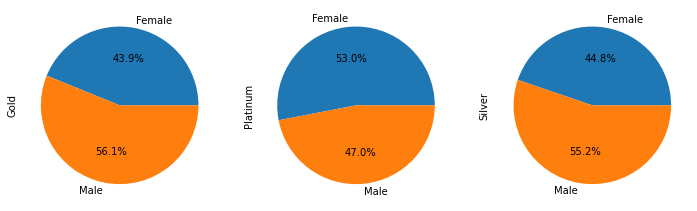

In [32]:
f1.plot(kind='pie',subplots=True,legend=False,figsize=(12,4),autopct='%1.1f%%')
plt.show()

In [33]:
most_gender=combine_data.loc[(combine_data.incident_cause.str.lower().str.contains('driver'))].groupby('gender')['gender'].count()
most_gender

gender
Female    222
Male      284
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count_of_gender'>

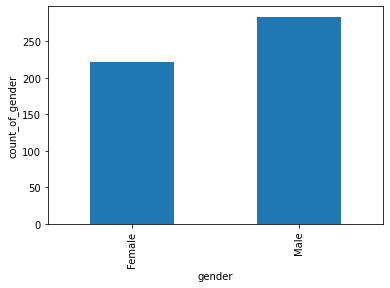

In [34]:
most_gender.plot(kind='bar',xlabel='gender',ylabel='count_of_gender')

In [35]:
combine_data['fraud']=np.where(combine_data.fraudulent=='Yes',1,0)
combine_data.head()

,customer_id,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age,Age_grp,fraud
0,21868593,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764,Driver error,2017-11-27,Auto,Material only,2980.0,1.0,No,0.0,38.87,Adult,0
1,75740424,Female,1970-01-13,ME,2.655431e+09,Silver,33985796,Crime,2018-10-03,Home,Material only,2980.0,3.0,No,0.0,48.72,Adult,0
2,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,53522022,Other driver error,2018-02-02,Auto,Material only,3369.5,1.0,Yes,0.0,33.90,Adult,1
3,30308357,Female,1984-03-11,TN,7.986315e+09,Silver,63017412,Driver error,2018-04-04,Auto,Material only,1950.0,6.0,No,0.0,34.06,Adult,0
4,47830476,Female,1986-05-01,MA,4.131878e+09,Silver,13015401,Natural causes,2018-06-17,Auto,Material only,1680.0,1.0,No,0.0,32.13,Adult,0


In [36]:
max_fraud=combine_data.groupby('Age_grp')['fraud'].sum().reset_index()
max_fraud

,Age_grp,fraud
0,Adult,173
1,Children,1
2,Youth,73


<AxesSubplot:xlabel='Age_grp', ylabel='fraud'>

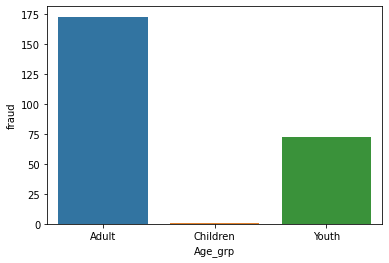

In [37]:
sns.barplot(data=max_fraud,x='Age_grp',y='fraud')

In [38]:
combine_data['cliam_month']=combine_data['claim_date'].dt.month

Text(0, 0.5, 'total_claim_amount')

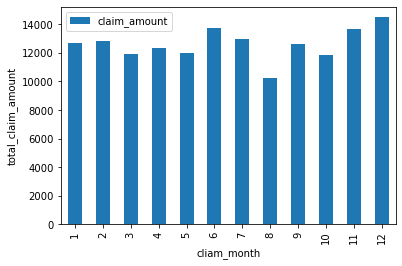

In [39]:
pd.pivot_table(combine_data,index='cliam_month',values='claim_amount').plot(kind='bar')
plt.ylabel('total_claim_amount')

In [40]:
fraudulent_claims=pd.DataFrame(combine_data.loc[combine_data.fraudulent=='Yes'].groupby(['gender','Age'])[['claim_amount']].mean())

In [41]:
non_fraudulent_claims=pd.DataFrame(combine_data.loc[combine_data.fraudulent=='No'].groupby(['gender','Age'])[['claim_amount']].mean())

In [42]:
claim_gender_age=pd.merge(fraudulent_claims,non_fraudulent_claims,on=('gender','Age'),suffixes=('_fraud','_non_fraud'))
claim_gender_age

claim_amount_fraud  claim_amount_non_fraud
gender Age                                              
Female 19.84          1276.50000            21190.000000
       21.75         12467.68457            10750.000000
       24.73         12467.68457             2420.000000
       27.41         32867.00000            30670.000000
       37.45          1679.00000             2560.000000
       39.00         33465.00000            25290.000000
       41.45          1920.50000            28950.000000
       46.11          2633.50000            18140.000000
       47.76         12467.68457            16940.000000
       48.64          1587.00000             2320.000000
       49.22          1265.00000             1610.000000
       51.78          2369.00000            14690.000000
       54.49          1150.00000             1670.000000
Male   20.38          2380.50000             2550.000000
       20.86          2185.00000             2710.000000
       22.43          2415.00000            21620.000000
       24.27          1472.00000             1460.000000
       27.00          3323.50000             2800.000000
       27.09          2714.00000            33080.000000
       28.38          1943.50000            25320.000000
       28.50          2668.00000            12467.684570
       31.79         42722.50000             2090.000000
       33.88         47610.00000             1730.000000
       34.23         31901.00000            20310.000000
       41.37          1759.50000             2240.000000
       41.71         30015.00000            34470.000000
       42.93          2587.50000            22570.000000
       43.65         37524.50000             1140.000000
       45.86          3346.50000             2740.000000
       50.52          2334.50000             8156.666504
       50.82         31498.50000             1510.000000
       52.97          2277.00000            36350.000000
       54.80          3093.50000            16070.000000
       57.87          2265.50000             1690.000000

array([<AxesSubplot:title={'center':'claim_amount_fraud'}, xlabel='gender,Age'>,
       <AxesSubplot:title={'center':'claim_amount_non_fraud'}, xlabel='gender,Age'>],
      dtype=object)

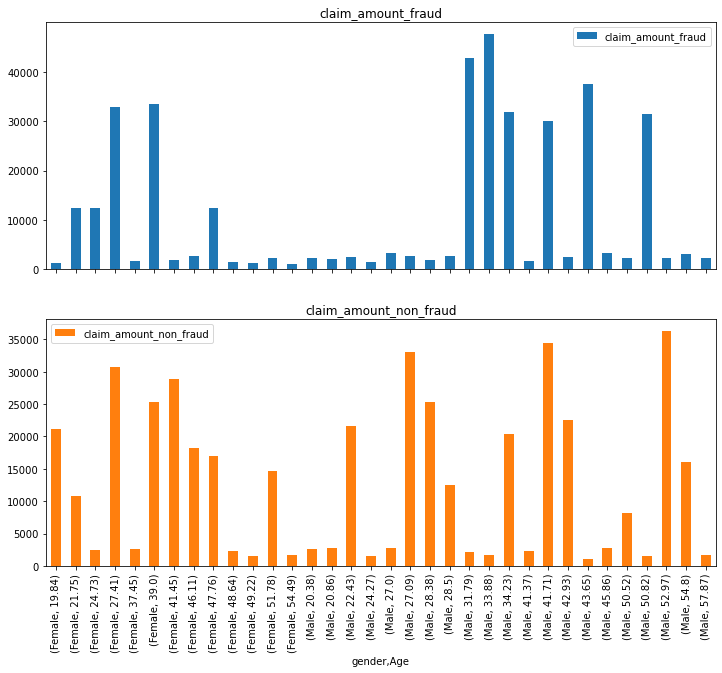

In [43]:
claim_gender_age.plot(kind='bar',subplots=True,figsize=(12,10))

In [44]:
female_claim=combine_data.loc[combine_data.gender=='Female'][['claim_amount']]
female_claim

,claim_amount
0,2980.0
1,2980.0
2,3369.5
3,1950.0
4,1680.0
...,...
1072,38950.0
1076,1380.0
1080,1770.0
1081,2800.0


In [45]:
Male_claim=combine_data.loc[combine_data.gender=='Male'][['claim_amount']]
Male_claim

,claim_amount
6,2680.0
7,2240.0
8,38306.5
9,36810.0
10,1730.0
...,...
1077,2290.0
1078,2320.0
1079,2173.5
1082,33080.0


In [46]:
#mean value of mail_claim and femail_claim
male_mean=Male_claim.mean()
male_mean

claim_amount    12853.052734
dtype: float32

In [47]:
female_mean=female_claim.mean()
female_mean

claim_amount    12062.632812
dtype: float32

In [48]:
# we have two different group so that we have to find two t_test 
import scipy.stats as stats

In [54]:
ttest,p_value=stats.ttest_ind(a=Male_claim,b=female_claim,equal_var=False)
eq_var

Ttest_indResult(statistic=array([0.973815], dtype=float32), pvalue=array([0.33036584]))

In [58]:
p_value

array([0.32996907])

In [59]:
if (p_value<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')
    

We fail to reject null hypothesis


In [60]:
print('similarity in the amount claimed by males and females')

similarity in the amount claimed by males and females


In [66]:
age_cat_seg=pd.crosstab(combine_data.Segment,combine_data.Age_grp,margins=True)
age_cat_seg

Age_grp,Adult,Children,Youth,All
Segment,,,,
Gold,265,4,106,375
Platinum,242,4,116,362
Silver,243,0,105,348
All,750,8,327,1085


In [77]:
chi_val,p_val,dof,expected=stats.chi2_contingency(observed=age_cat_seg)
chi_val,p_val,dof,expected

(5.078084727560357,
 0.8274489613832554,
 9,
 array([[ 259.21658986,    2.76497696,  113.01843318,  375.        ],
        [ 250.23041475,    2.66912442,  109.10046083,  362.        ],
        [ 240.55299539,    2.56589862,  104.88110599,  348.        ],
        [ 750.        ,    8.        ,  327.        , 1085.        ]]))

In [79]:
if (p_val<0.05):
    print('We reject null hypothesis : There is relationship between age category and segment ')
else:
    print('We fail to reject null hypothesis : There is no relationship between age category and segment ')

We fail to reject null hypothesis : There is no relationship between age category and segment 


In [ ]:
# pearsons coeffecient 

In [82]:
combine_data['Year']=combine_data['claim_date'].dt.year

In [87]:
current_year=combine_data[combine_data.Year==2018]['claim_amount']
Y2016_2017= combine_data[combine_data.Year==2017]['claim_amount']

In [89]:
stats.pearsonr(current_year,Y2016_2017)
#not able to perform

ValueError: x and y must have the same length.

In [98]:
# here we will find ftest ANNOVA

In [97]:
age_cat1=combine_data[combine_data.Age_grp=='Adult']['total_policy_claims']
age_cat2=combine_data[combine_data.Age_grp=='Youth']['total_policy_claims']
age_cat3=combine_data[combine_data.Age_grp=='Children']['total_policy_claims']


In [100]:
statistic,pvalue=stats.f_oneway(age_cat1,age_cat2,age_cat3)

In [101]:
pvalue

0.6683225744039021

In [102]:
if (pvalue<0.05):
    print('We reject null hypothesis : There is difference between age groups and insurance claims ')
else:
    print('We fail to reject null hypothesis : There is no difference between age groups and insurance claims')

We fail to reject null hypothesis : There is no difference between age groups and insurance claims


In [104]:
combine_data.total_policy_claims.corr(other=combine_data.claim_amount)

-0.01744856288976239

In [105]:
# as the correlation is negative of policy claims in inversely propotional to the claimed amount